# Information Retrieval



Assignment 2

Team members:

1: Tooraj *Taraz*

2: MohammadReza Tashakkori

3: Iman Jalali

4: Seyed MohammadTaha Tabatabayi


In [4]:
import hazm
import nltk
import pandas

In [5]:
df_persian = pandas.read_excel('/home/toorajtaraz/Documents/projects/ClassProjects/final_books.xlsx')
df_persian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2824 non-null   object
 1   date      2824 non-null   object
 2   content   2441 non-null   object
 3   category  2824 non-null   object
 4   author    2824 non-null   object
 5   comments  2824 non-null   object
dtypes: object(6)
memory usage: 132.5+ KB


In [6]:
df_persian.head()

,title,date,content,category,author,comments
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه


In [7]:
from __future__ import unicode_literals
from hazm import Normalizer

In [8]:
normalizer = Normalizer()

In [9]:
import numpy as np

In [10]:
normalized_persian_tokens = []
all_punct = '''،!()-[]{};:'"\,<>./؟?@#$%^&*_~'''
for index, row in df_persian.iterrows():
  content = row["content"]
  try:
    if len(content) < 1:
      continue
  except:
    continue
  for p in all_punct:
    content = content.replace(p, '')
  normalized_content = normalizer.normalize(content)
  normalized_persian_tokens.append((index, normalized_content))



normalized_persian_tokens[0]

(0,
 ' تی دی جیکس یک کشیش نویسنده سخنران آمریکایی است سمینار\u200cهای تی دی جیکس اغلب انگیزشی و مذهبی است به همین دلیل او در ایران به سخنران انگیزشی سیاه پوست لقب گرفته است در زندگینامه تی دی جیکس شاهد فعالیت\u200cهای مختلفی هستیم که هر کدام از آنها خواهان تجربه و تلاش زیادی هستند مواردی که اعلام شد تنها بخشی از فعالیت\u200cهای جیکس است او هم اکنون کشیش خانه پاتر است و مخاطبان بسیاری دارد موعظه\u200cهای و سخنرانی\u200cها تی دی جیکس در کلیسا از شبکه\u200cهای تلویزیونی و رادیویی مختلف پخش می\u200cشوند این کتاب گزیده\u200cای از سخنرانی\u200cهای آقای جیکز یکی از بهترین سخنران\u200cهای انگیزشی در دنیا است امید است با مطالعه دقیق و باور عمیق تغییری مثبت در زندگیتان ایجاد شود')

In [11]:
from hazm import sent_tokenize, word_tokenize

In [12]:
tokenized_normal_sent_persian = []
for index, normalized_sent in normalized_persian_tokens:
  sent_tokens = sent_tokenize(normalized_sent)
  word_tokens = word_tokenize(normalized_sent)
  tokenized_normal_sent_persian.append((index, sent_tokens, word_tokens))

persian_final_df = pandas.DataFrame(tokenized_normal_sent_persian, columns =['index in original persian df', 'sent_token', 'word_token'])
persian_final_df.head()

# persian_final_df.to_csv("persian_token.csv")

,index in original persian df,sent_token,word_token
0,0,[تی دی جیکس یک کشیش نویسنده سخنران آمریکایی اس...,"[تی, دی, جیکس, یک, کشیش, نویسنده, سخنران, آمری..."
1,1,[کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,"[کتاب, حاضر, که, اینک, در, دسترس, خوانندگان, م..."
2,2,[دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,"[دکتر, فتح, الله, بینا, تحصیلات, خود, را, در, ..."
3,3,[مجموعه پیش رو مطالبیست که در گروه Evolution ت...,"[مجموعه, پیش, رو, مطالبیست, که, در, گروه, Evol..."
4,4,[کتاب آسمان پرستاره نوشته‌ی کتی هایدن به زبانی...,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, به..."


In [13]:
# adding sent and word tokens as coloums to the original df based on index
df_persian['sent_token'] = persian_final_df['sent_token']
df_persian['word_token'] = persian_final_df['word_token']

df_persian.head()

,title,date,content,category,author,comments,sent_token,word_token
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه,[تی دی جیکس یک کشیش نویسنده سخنران آمریکایی اس...,"[تی, دی, جیکس, یک, کشیش, نویسنده, سخنران, آمری..."
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه,[کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,"[کتاب, حاضر, که, اینک, در, دسترس, خوانندگان, م..."
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه,[دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,"[دکتر, فتح, الله, بینا, تحصیلات, خود, را, در, ..."
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه,[مجموعه پیش رو مطالبیست که در گروه Evolution ت...,"[مجموعه, پیش, رو, مطالبیست, که, در, گروه, Evol..."
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه,[کتاب آسمان پرستاره نوشته‌ی کتی هایدن به زبانی...,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, به..."


In [14]:
# first we need to remove stop words from the persian text using hazm
from hazm import stopwords_list

stopwords = stopwords_list()

# removing stop words from the persian text and storing the cleaned word tokens in a new column
def remove_stopwords(word_tokens):
  # if word_tokens is not a list, then return an empty list
    if not isinstance(word_tokens, list):
        return []
    # if word_tokens is a list, then return a list of words that are not in the stopwords list
    return [word for word in word_tokens if word not in stopwords]

df_persian['hazm_cleaned_word_token'] = df_persian['word_token'].apply(remove_stopwords)

df_persian.head()

,title,date,content,category,author,comments,sent_token,word_token,hazm_cleaned_word_token
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه,[تی دی جیکس یک کشیش نویسنده سخنران آمریکایی اس...,"[تی, دی, جیکس, یک, کشیش, نویسنده, سخنران, آمری...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی..."
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه,[کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,"[کتاب, حاضر, که, اینک, در, دسترس, خوانندگان, م...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر..."
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه,[دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,"[دکتر, فتح, الله, بینا, تحصیلات, خود, را, در, ...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ..."
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه,[مجموعه پیش رو مطالبیست که در گروه Evolution ت...,"[مجموعه, پیش, رو, مطالبیست, که, در, گروه, Evol...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج..."
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه,[کتاب آسمان پرستاره نوشته‌ی کتی هایدن به زبانی...,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, به...","[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب..."


In [15]:
# we are going to do stemming and lemmentization on the persian text using hazm and parsivar
# first we handle things using hazm
# we are going to use the stemmer and lemmatizer from hazm

from hazm import Stemmer, Lemmatizer

In [16]:
# we stem the word_tokens in the persian df using hazm stemmer
stemmer = Stemmer()
hazm_stemmed_persian_tokens = []

for index, row in df_persian.iterrows():
    word_tokens = row["hazm_cleaned_word_token"]
    stemmed_word_tokens = []
    # if word_tokens is not a list we skip it
    if not isinstance(word_tokens, list):
        hazm_stemmed_persian_tokens.append((index, stemmed_word_tokens))
        continue
    for word in word_tokens:
        # if word is not a str we skip it
        if not isinstance(word, str):
            continue
        stemmed_word = stemmer.stem(word)
        stemmed_word_tokens.append(stemmed_word)
    hazm_stemmed_persian_tokens.append((index, stemmed_word_tokens))

# add a new column to the persian df for the stemmed tokens
df_persian['hazm_stemmed_word_token'] = [x[1] for x in hazm_stemmed_persian_tokens]

df_persian.head()


,title,date,content,category,author,comments,sent_token,word_token,hazm_cleaned_word_token,hazm_stemmed_word_token
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه,[تی دی جیکس یک کشیش نویسنده سخنران آمریکایی اس...,"[تی, دی, جیکس, یک, کشیش, نویسنده, سخنران, آمری...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[ت, د, جیکس, کش, نویسنده, سخنر, آمریکا, سمینار..."
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه,[کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,"[کتاب, حاضر, که, اینک, در, دسترس, خوانندگان, م...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خوانندگ, محتر, قرار,..."
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه,[دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,"[دکتر, فتح, الله, بینا, تحصیلات, خود, را, در, ...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ...","[دک, فتح, الله, بینا, تحصیل, رشته, پزشک, دنبال..."
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه,[مجموعه پیش رو مطالبیست که در گروه Evolution ت...,"[مجموعه, پیش, رو, مطالبیست, که, در, گروه, Evol...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیس, گروه, Evolution, توسط, اینجا..."
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه,[کتاب آسمان پرستاره نوشته‌ی کتی هایدن به زبانی...,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, به...","[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب...","[کتاب, آس, پرستاره, نوشته, کت, هایدن, زبان, سا..."


In [17]:
# only view the first 5 rows of the persian df and word_token and hazm_stemmed_word_token columns
df_persian[['hazm_cleaned_word_token', 'hazm_stemmed_word_token']].head()

,hazm_cleaned_word_token,hazm_stemmed_word_token
0,"[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[ت, د, جیکس, کش, نویسنده, سخنر, آمریکا, سمینار..."
1,"[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خوانندگ, محتر, قرار,..."
2,"[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ...","[دک, فتح, الله, بینا, تحصیل, رشته, پزشک, دنبال..."
3,"[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیس, گروه, Evolution, توسط, اینجا..."
4,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب...","[کتاب, آس, پرستاره, نوشته, کت, هایدن, زبان, سا..."


In [18]:
# now we handle lemmentization using hazm lemmatizer
lemmatizer = Lemmatizer()
hazm_lemmatized_persian_tokens = []

for index, row in df_persian.iterrows():
    word_tokens = row["hazm_cleaned_word_token"]
    lemmatized_word_tokens = []
    # if word_tokens is not a list we skip it
    if not isinstance(word_tokens, list):
        hazm_lemmatized_persian_tokens.append((index, lemmatized_word_tokens))
        continue
    for word in word_tokens:
        # if word is not a str we skip it
        if not isinstance(word, str):
            continue
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_word_tokens.append(lemmatized_word)
    hazm_lemmatized_persian_tokens.append((index, lemmatized_word_tokens))

# add a new column to the persian df for the lemmatized tokens
df_persian['hazm_lemmatized_word_token'] = [x[1] for x in hazm_lemmatized_persian_tokens]

df_persian.head()

,title,date,content,category,author,comments,sent_token,word_token,hazm_cleaned_word_token,hazm_stemmed_word_token,hazm_lemmatized_word_token
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه,[تی دی جیکس یک کشیش نویسنده سخنران آمریکایی اس...,"[تی, دی, جیکس, یک, کشیش, نویسنده, سخنران, آمری...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[ت, د, جیکس, کش, نویسنده, سخنر, آمریکا, سمینار...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی..."
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه,[کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,"[کتاب, حاضر, که, اینک, در, دسترس, خوانندگان, م...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خوانندگ, محتر, قرار,...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر..."
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه,[دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,"[دکتر, فتح, الله, بینا, تحصیلات, خود, را, در, ...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ...","[دک, فتح, الله, بینا, تحصیل, رشته, پزشک, دنبال...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشک, د..."
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه,[مجموعه پیش رو مطالبیست که در گروه Evolution ت...,"[مجموعه, پیش, رو, مطالبیست, که, در, گروه, Evol...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیس, گروه, Evolution, توسط, اینجا...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج..."
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه,[کتاب آسمان پرستاره نوشته‌ی کتی هایدن به زبانی...,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, به...","[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب...","[کتاب, آس, پرستاره, نوشته, کت, هایدن, زبان, سا...","[کتاب, آسمان, پرستاره, نوشته, کت, هایدن, زبان,..."


In [19]:
# only view the first 5 rows of the persian df and word_token and hazm_lemmatized_word_token columns
df_persian[['hazm_cleaned_word_token', 'hazm_lemmatized_word_token']].head()

,hazm_cleaned_word_token,hazm_lemmatized_word_token
0,"[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی..."
1,"[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر..."
2,"[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشک, د..."
3,"[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج..."
4,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب...","[کتاب, آسمان, پرستاره, نوشته, کت, هایدن, زبان,..."


In [20]:
# printing the first 5 rows of the persian df and word_token and hazm_stemmed_word_token columns
for index, row in df_persian.iterrows():
    for word, stemmed, lemmatized in zip(row["hazm_cleaned_word_token"], row["hazm_stemmed_word_token"], row["hazm_lemmatized_word_token"]):
        print(word, stemmed, lemmatized)
    break

تی ت تی
دی د دی
جیکس جیکس جیکس
کشیش کش کشیش
نویسنده نویسنده نویسنده
سخنران سخنر سخنران
آمریکایی آمریکا آمریکایی
سمینار‌های سمینار سمینار‌های
تی ت تی
دی د دی
جیکس جیکس جیکس
انگیزشی انگیزش انگیزش
مذهبی مذهب مذهب
دلیل دلیل دلیل
ایران ایر ایران
سخنران سخنر سخنران
انگیزشی انگیزش انگیزش
سیاه سیاه سیاه
پوست پوس پوست
لقب لقب لقب
زندگینامه زندگینامه زندگینامه
تی ت تی
دی د دی
جیکس جیکس جیکس
شاهد شاهد شاهد
فعالیت‌های فعالیت فعالیت
مختلفی مختلف مختلف
خواهان خواه خواهان
تجربه تجربه تجربه
تلاش تلا تلاش
مواردی موارد موارد
اعلام اعلا اعلام
فعالیت‌های فعالیت فعالیت
جیکس جیکس جیکس
کشیش کش کشیش
خانه خانه خانه
پاتر پا پاتر
مخاطبان مخاطب مخاطب
موعظه‌های موعظه موعظه
سخنرانی‌ها سخنرانی سخنرانی‌ها
تی ت تی
دی د دی
جیکس جیکس جیکس
کلیسا کلیسا کلیسا
شبکه‌های شبکه شبکه
تلویزیونی تلویزیون تلویزیون
رادیویی رادیو رادیو
مختلف مختلف مختلف
کتاب کتاب کتاب
گزیده‌ای گزیده گزیده
سخنرانی‌های سخنرانی سخنرانی‌های
جیکز جیکز جیکز
سخنران‌های سخنران سخنران
انگیزشی انگیزش انگیزش
دنیا دنیا دنیا
امید امید امید
مطالعه مطالعه مطالعه
دق

In [23]:
# save the df
df_persian.to_csv("persian_df.csv")

In [ ]:
# load df 
df_persian = pandas.read_csv("persian_df.csv")

In [24]:
from parsivar import FindStems, Tokenizer

# we are going to use parsivar to do stemming and lemmentization on the persian text
# first we handle things using parsivar
# we are going to use the stemmer and lemmatizer from parsivar

# we stem the cleaned word_tokens in the persian df using parsivar stemmer
parsivar_stemmer = FindStems()
parsivar_stemmed_persian_tokens = []

for index, row in df_persian.iterrows():
    word_tokens = row["hazm_cleaned_word_token"]
    stemmed_word_tokens = []
    # if word_tokens is not a list we skip it
    if not isinstance(word_tokens, list):
        parsivar_stemmed_persian_tokens.append((index, stemmed_word_tokens))
        continue
    for word in word_tokens:
        # if word is not a str we skip it
        if not isinstance(word, str):
            continue
        stemmed_word = parsivar_stemmer.convert_to_stem(word)
        stemmed_word_tokens.append(stemmed_word)
    parsivar_stemmed_persian_tokens.append((index, stemmed_word_tokens))

# add a new column to the persian df for the stemmed tokens
df_persian['parsivar_stemmed_word_token'] = [x[1] for x in parsivar_stemmed_persian_tokens]

df_persian.head()


,title,date,content,category,author,comments,sent_token,word_token,hazm_cleaned_word_token,hazm_stemmed_word_token,hazm_lemmatized_word_token,parsivar_stemmed_word_token
0,بهترین درسهای زندگی‎,۲ دی ۱۳۹۸,تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی ...,روانشناسی,سارا رزولت,بدون دیدگاه,[تی دی جیکس یک کشیش نویسنده سخنران آمریکایی اس...,"[تی, دی, جیکس, یک, کشیش, نویسنده, سخنران, آمری...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[ت, د, جیکس, کش, نویسنده, سخنر, آمریکا, سمینار...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی..."
1,از سلاجقه تا صفویه,۱ دی ۱۳۹۸,کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,تاریخ ایران,نصرت الله مشکوتی,بدون دیدگاه,[کتاب حاضر که اینک در دسترس خوانندگان محترم قر...,"[کتاب, حاضر, که, اینک, در, دسترس, خوانندگان, م...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خوانندگ, محتر, قرار,...","[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خواننده, محترم, قرار..."
2,سرگذشت رضاشاه,۲۹ آذر ۱۳۹۸,دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,تاریخ ایران,فتح الله بینا,بدون دیدگاه,[دکتر فتح الله بینا تحصیلات خود را در رشته پزش...,"[دکتر, فتح, الله, بینا, تحصیلات, خود, را, در, ...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ...","[دک, فتح, الله, بینا, تحصیل, رشته, پزشک, دنبال...","[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشک, د...","[دکتر, فتح, الله, نا, تحصیلات, رشته, پزشکی, دن..."
3,سیری نوین در فرگشت و اسرار مغز,۲۸ آذر ۱۳۹۸,مجموعه پیش رو مطالبیست که در گروه Evolution ت...,علم و دانش,مانی منوچهری,بدون دیدگاه,[مجموعه پیش رو مطالبیست که در گروه Evolution ت...,"[مجموعه, پیش, رو, مطالبیست, که, در, گروه, Evol...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیس, گروه, Evolution, توسط, اینجا...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج..."
4,آسمان پرستاره,۲۶ آذر ۱۳۹۸,کتاب آسمان پرستاره نوشته‌ی کتی هایدن، به زبان...,کودکان و نوجوانان,کتی هایدن,بدون دیدگاه,[کتاب آسمان پرستاره نوشته‌ی کتی هایدن به زبانی...,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, به...","[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب...","[کتاب, آس, پرستاره, نوشته, کت, هایدن, زبان, سا...","[کتاب, آسمان, پرستاره, نوشته, کت, هایدن, زبان,...","[کتاب, آسمان, پرستاره, نوشته, کتی, هایدن, زبان..."


In [25]:
# only view the first 5 rows of the persian df and word_token and parsivar_stemmed_word_token columns
df_persian[['hazm_cleaned_word_token', 'parsivar_stemmed_word_token']].head()

,hazm_cleaned_word_token,parsivar_stemmed_word_token
0,"[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی...","[تی, دی, جیکس, کشیش, نویسنده, سخنران, آمریکایی..."
1,"[کتاب, حاضر, اینک, دسترس, خوانندگان, محترم, قر...","[کتاب, حاضر, اینک, دسترس, خواننده, محترم, قرار..."
2,"[دکتر, فتح, الله, بینا, تحصیلات, رشته, پزشکی, ...","[دکتر, فتح, الله, نا, تحصیلات, رشته, پزشکی, دن..."
3,"[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج...","[مجموعه, مطالبیست, گروه, Evolution, توسط, اینج..."
4,"[کتاب, آسمان, پرستاره, نوشته‌ی, کتی, هایدن, زب...","[کتاب, آسمان, پرستاره, نوشته, کتی, هایدن, زبان..."


In [26]:
# Now we put all the cleaned words in all coloumns together and create a word cloud from it

# we are going to use the wordcloud library to create a word cloud from the persian text
from wordcloud import WordCloud
# we should use arabic-reshaper to reshape the persian text
from arabic_reshaper import reshape

In [29]:
# we combine all the cleaned words in all columns together
all_words = []
for index, row in df_persian.iterrows():
    all_words += row["hazm_cleaned_word_token"]

# we reshape the persian text
reshaped_text = reshape(" ".join(all_words))

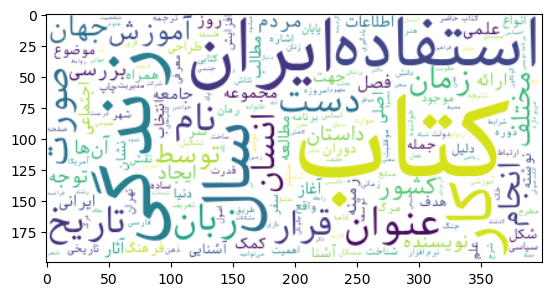

In [32]:
# before we can display farsi we need to prepare the text
# we are going to use the arabic_reshaper library to reshape the persian text
# we are going to use the bidi library to display the persian text
from bidi.algorithm import get_display
import arabic_reshaper

# we reshape the persian text
reshaped_text = arabic_reshaper.reshape(" ".join(all_words))
# we display the persian text
reshaped_text = get_display(reshaped_text)

# we create a word cloud from the reshaped text
# we use the persian font
wordcloud = WordCloud(font_path="/home/toorajtaraz/Documents/projects/ClassProjects/resources/fonts/Nika-Regular.ttf", background_color="white").generate(reshaped_text)


from matplotlib import pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')

In [35]:
# finally we should represent the problems with hazm stemming using three examples
problematic_word_1 = "کشیش"
problematic_word_2 = "زندگی"
problematic_word_3 = "ایران"

# we stem the problematic words using hazm stemmer
hazm_stemmer = Stemmer()
print(f"stem of {problematic_word_1} is {hazm_stemmer.stem(problematic_word_1)}")
print(f"stem of {problematic_word_2} is {hazm_stemmer.stem(problematic_word_2)}")
print(f"stem of {problematic_word_3} is {hazm_stemmer.stem(problematic_word_3)}")

stem of کشیش is کش
stem of زندگی is زندگ
stem of ایران is ایر


In [36]:
df_persian.to_csv("persian_df.csv")